<a href="https://colab.research.google.com/github/shrayan005/AI_final_coursework/blob/main/Movies_boxoffice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/mcu_box_office.csv")

# See first few rows
df.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


In [3]:
df.describe()

,mcu_phase,tomato_meter,audience_score,movie_duration
count,27.000000,27.000000,27.000000,27.000000
mean,2.481481,83.555556,83.740741,131.925926
std,1.014145,11.112479,11.002072,15.531422
min,1.000000,47.000000,45.000000,111.000000
25%,2.000000,79.000000,78.000000,122.500000
50%,3.000000,87.000000,87.000000,130.000000
75%,3.000000,91.500000,91.000000,138.000000
max,4.000000,96.000000,98.000000,181.000000


In [4]:
df.isnull().sum()

,0
movie_title,0
mcu_phase,0
release_date,0
tomato_meter,0
audience_score,0
movie_duration,0
production_budget,0
opening_weekend,0
domestic_box_office,0
worldwide_box_office,0


In [12]:
corr_matrix=df.corr(numeric_only=True)
corr_matrix

,mcu_phase,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
mcu_phase,1.000000,0.115278,0.290832,0.436997,0.164697,0.207150,0.221170,0.226816
tomato_meter,0.115278,1.000000,0.530359,0.135961,0.129395,0.367428,0.482284,0.410379
audience_score,0.290832,0.530359,1.000000,0.363841,0.211768,0.183380,0.242755,0.231486
movie_duration,0.436997,0.135961,0.363841,1.000000,0.798259,0.769969,0.690246,0.739266
production_budget,0.164697,0.129395,0.211768,0.798259,1.000000,0.819052,0.688485,0.794979
opening_weekend,0.207150,0.367428,0.183380,0.769969,0.819052,1.000000,0.955359,0.967637
domestic_box_office,0.221170,0.482284,0.242755,0.690246,0.688485,0.955359,1.000000,0.946955
worldwide_box_office,0.226816,0.410379,0.231486,0.739266,0.794979,0.967637,0.946955,1.000000


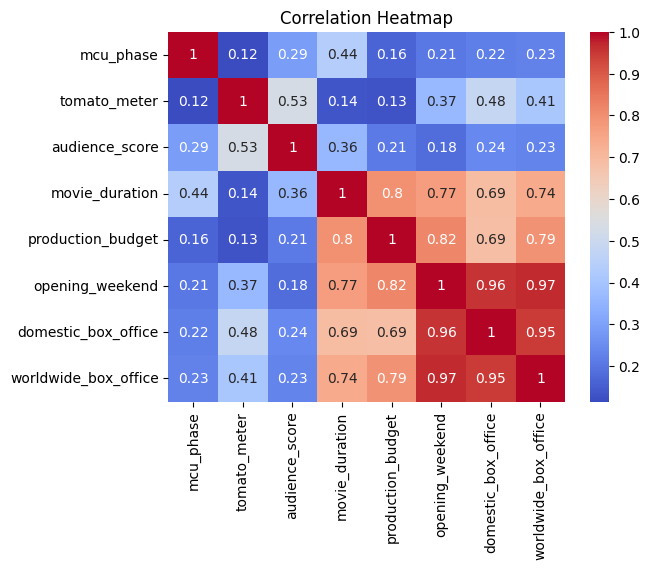

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
df = df.drop(['movie_title', 'release_date'], axis=1)


In [19]:
money_cols = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']

for col in money_cols:
    df[col] = df[col].replace(',', '', regex=True)  # remove ,
    df[col] = pd.to_numeric(df[col], errors='coerce')   # convert to numeric


In [20]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   mcu_phase             27 non-null     int64
 1   tomato_meter          27 non-null     int64
 2   audience_score        27 non-null     int64
 3   movie_duration        27 non-null     int64
 4   production_budget     27 non-null     int64
 5   opening_weekend       27 non-null     int64
 6   domestic_box_office   27 non-null     int64
 7   worldwide_box_office  27 non-null     int64
dtypes: int64(8)
memory usage: 1.8 KB


,mcu_phase,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,1,94,91,126,186000000,102118668,318604126,585171547
1,1,67,70,112,137500000,55414050,134806913,265573859
2,1,72,71,124,170000000,128122480,312433331,621156389
3,1,77,76,113,150000000,65723338,181030624,449326618
4,1,79,75,124,140000000,65058524,176654505,370569776


In [22]:
target="worldwide_box_office"
corr_with_traget=corr_matrix[target]
corr_with_traget.sort_values(ascending=False)

,worldwide_box_office
worldwide_box_office,1.000000
opening_weekend,0.967637
domestic_box_office,0.946955
production_budget,0.794979
movie_duration,0.739266
tomato_meter,0.410379
audience_score,0.231486
mcu_phase,0.226816


In [32]:
threshold=0.5
strong_corr=corr_with_traget[abs(corr_with_traget)>threshold].drop(target).index
strong_corr.sort_values(ascending=False)

Index(['production_budget', 'opening_weekend', 'movie_duration',
       'domestic_box_office'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

X = df[strong_corr] # features
y = df[target] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 3.4677740525107316e+16
R² Score: 0.9462888409894151


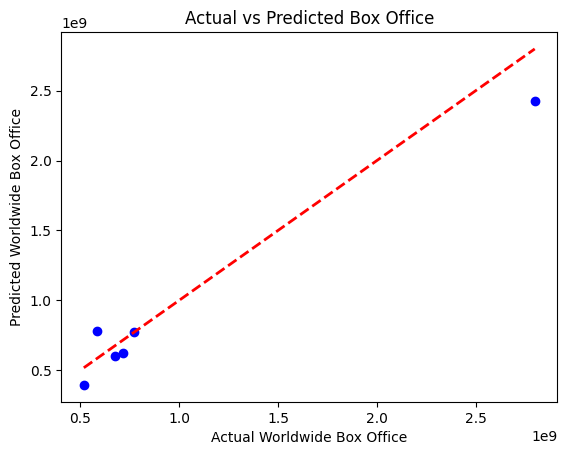

In [36]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Worldwide Box Office')
plt.ylabel('Predicted Worldwide Box Office')
plt.title('Actual vs Predicted Box Office')
plt.show()

In [43]:
table=pd.DataFrame({
    "Actual":y_test,
    "Predicted":y_pred,
    "Loss":abs(y_test-y_pred)
})
table


,Actual,Predicted,Loss
8,714401889,6.240086e+08,9.039330e+07
13,676354481,6.033640e+08,7.299046e+07
9,770882395,7.775071e+08,6.624708e+06
21,2797800564,2.422747e+09,3.750534e+08
0,585171547,7.821726e+08,1.970011e+08
11,518858449,3.961820e+08,1.226764e+08
